<a href="https://colab.research.google.com/github/2215151050haque/Simulation_Lab/blob/main/Assignment-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


λ=3, μ=4, Queue Limit: ∞
Server Utilization: 78.08%
Average Waiting Time: 0.57 units
Average Queue Length: 0.81 customers


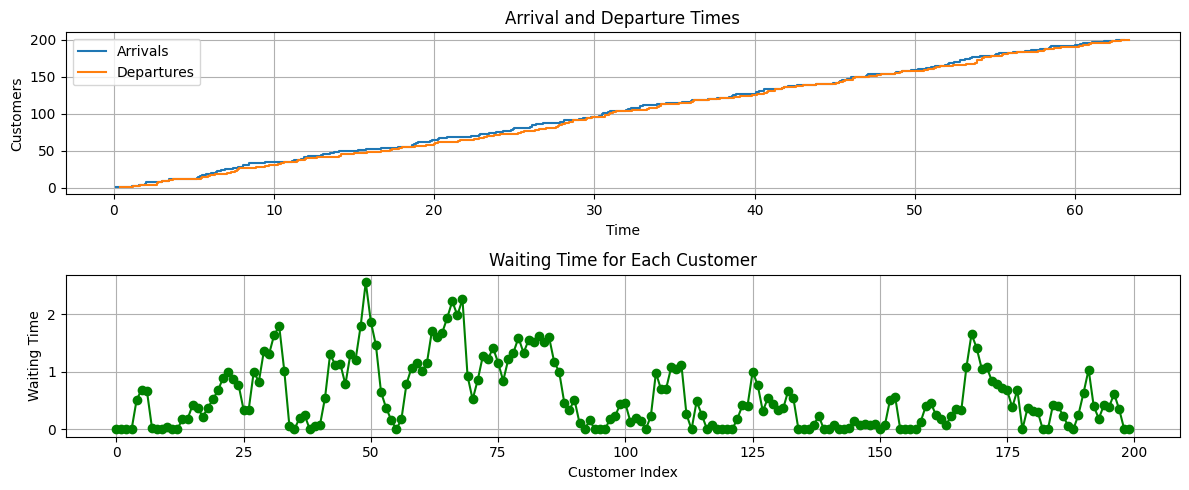


λ=8, μ=6, Queue Limit: ∞
Server Utilization: 98.11%
Average Waiting Time: 5.44 units
Average Queue Length: 0.97 customers


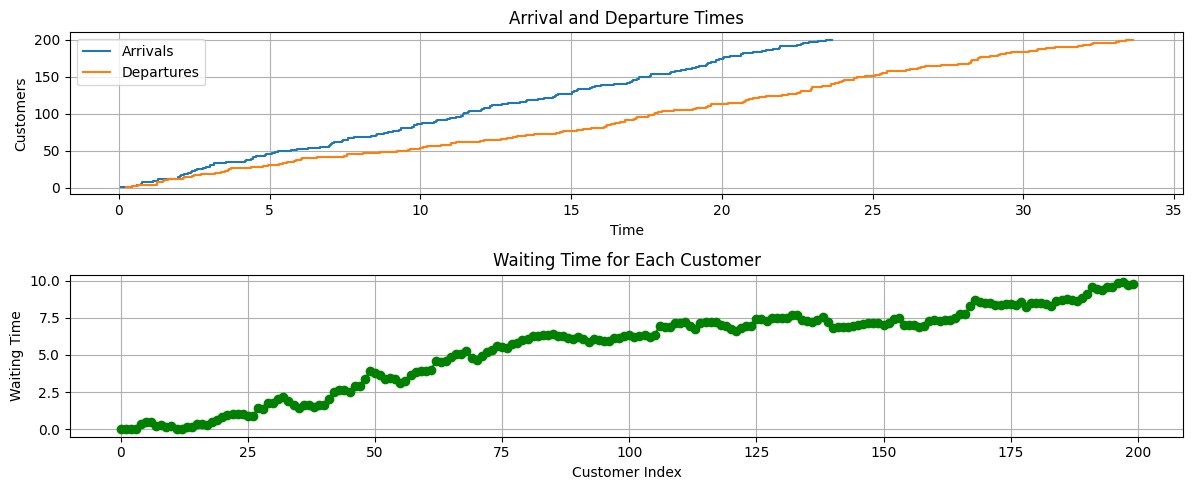


λ=8, μ=6, Queue Limit: 10
Server Utilization: 115.21%
Average Waiting Time: 0.63 units
Average Queue Length: 0.81 customers
Dropped Customers: 18


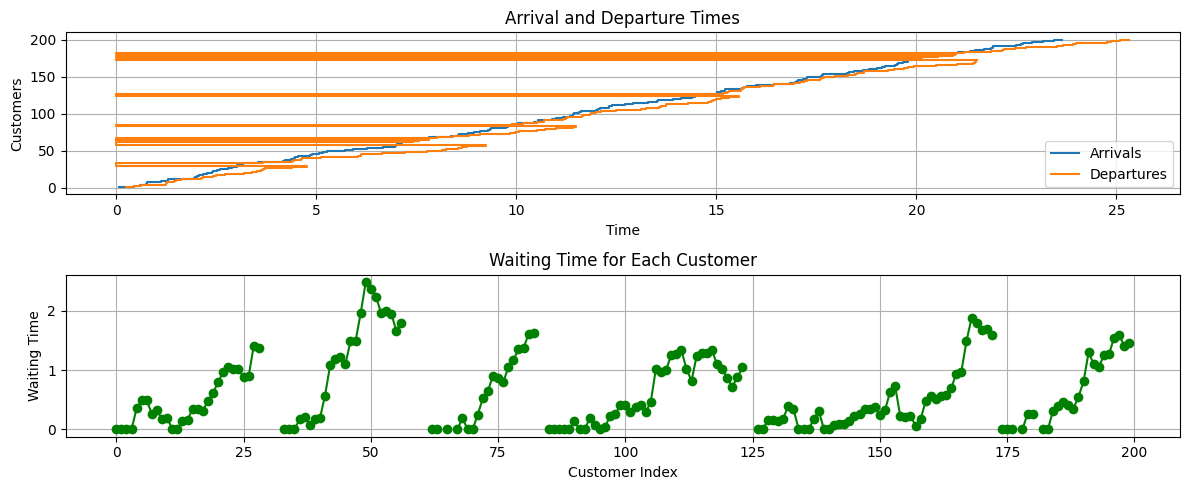

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Simulation Function --------
def simulate_queue(lambda_rate, mu_rate, n_customers=200, queue_limit=None):
    np.random.seed(42)  # For reproducibility

    # Step 1: Generate times
    inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
    service_times = np.random.exponential(1/mu_rate, n_customers)

    arrival_times = np.cumsum(inter_arrival_times)  # Actual arrival times

    # Step 2: Initialize
    start_times = np.zeros(n_customers)
    end_times = np.zeros(n_customers)
    waiting_times = np.zeros(n_customers)
    dropped_customers = 0

    # Step 3: Simulate queue
    for i in range(n_customers):
        if i == 0:
            start_times[i] = arrival_times[i]
        else:
            start_times[i] = max(arrival_times[i], end_times[i-1])

        # Check if queue is full (only if queue_limit is set)
        if queue_limit is not None:
            queue_length = np.sum((arrival_times < arrival_times[i]) & (end_times > arrival_times[i]))
            if queue_length >= queue_limit:
                waiting_times[i] = np.nan  # Customer leaves, not served
                dropped_customers += 1
                continue

        end_times[i] = start_times[i] + service_times[i]
        waiting_times[i] = start_times[i] - arrival_times[i]

    # Step 4: Calculate metrics
    valid_waits = waiting_times[~np.isnan(waiting_times)]
    avg_waiting_time = np.mean(valid_waits)
    server_utilization = np.sum(service_times[~np.isnan(waiting_times)]) / end_times[~np.isnan(waiting_times)].max()
    avg_queue_length = np.mean(valid_waits > 0)

    # Step 5: Print Results
    print(f"\nλ={lambda_rate}, μ={mu_rate}, Queue Limit: {queue_limit or '∞'}")
    print(f"Server Utilization: {server_utilization*100:.2f}%")
    print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
    print(f"Average Queue Length: {avg_queue_length:.2f} customers")
    if queue_limit is not None:
        print(f"Dropped Customers: {dropped_customers}")

    # Step 6: Plot
    plt.figure(figsize=(12,5))

    # Timeline: arrivals vs departures
    plt.subplot(2, 1, 1)
    plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
    plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
    plt.xlabel('Time')
    plt.ylabel('Customers')
    plt.title('Arrival and Departure Times')
    plt.grid(True)
    plt.legend()

    # Waiting time per customer
    plt.subplot(2, 1, 2)
    plt.plot(range(n_customers), waiting_times, 'go-', label='Waiting Time')
    plt.xlabel('Customer Index')
    plt.ylabel('Waiting Time')
    plt.title('Waiting Time for Each Customer')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# -------- Run All 3 Scenarios --------

# Part 1: λ = 3, μ = 4
simulate_queue(lambda_rate=3, mu_rate=4, n_customers=200)

# Part 2: λ = 8, μ = 6 (Overload)
simulate_queue(lambda_rate=8, mu_rate=6, n_customers=200)

# Part 3: λ = 8, μ = 6, with limited queue capacity = 10
simulate_queue(lambda_rate=8, mu_rate=6, n_customers=200, queue_limit=10)
